# Self Organizing Map

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

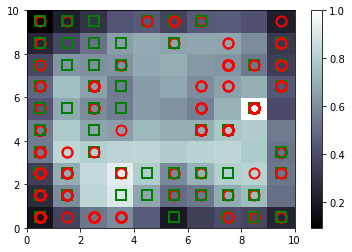

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [9]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,2)], mappings[(8,5)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[  1.58033780e+07   1.00000000e+00   3.49200000e+01   5.00000000e+00
    2.00000000e+00   1.40000000e+01   8.00000000e+00   7.50000000e+00
    1.00000000e+00   1.00000000e+00   6.00000000e+00   1.00000000e+00
    2.00000000e+00   0.00000000e+00   1.00100000e+03]
 [  1.57307930e+07   1.00000000e+00   2.72500000e+01   1.58500000e+00
    2.00000000e+00   1.30000000e+01   8.00000000e+00   1.83500000e+00
    1.00000000e+00   1.00000000e+00   1.20000000e+01   1.00000000e+00
    2.00000000e+00   5.83000000e+02   7.14000000e+02]
 [  1.57887760e+07   1.00000000e+00   3.31700000e+01   1.00000000e+00
    2.00000000e+00   1.40000000e+01   4.00000000e+00   7.50000000e-01
    1.00000000e+00   1.00000000e+00   7.00000000e+00   1.00000000e+00
    2.00000000e+00   3.40000000e+02   4.07200000e+03]
 [  1.57672310e+07   1.00000000e+00   2.41700000e+01   8.75000000e-01
    2.00000000e+00   1.10000000e+01   4.00000000e+00   4.62500000e+00
    1.00000000e+00   1.00000000e+00   2.00000000e+00   1.00000000e+0